Accuracy: 0.9210740439381611
[1]
[[0.03750701 0.96249299]]


<Axes: xlabel='Sentiment_Label'>

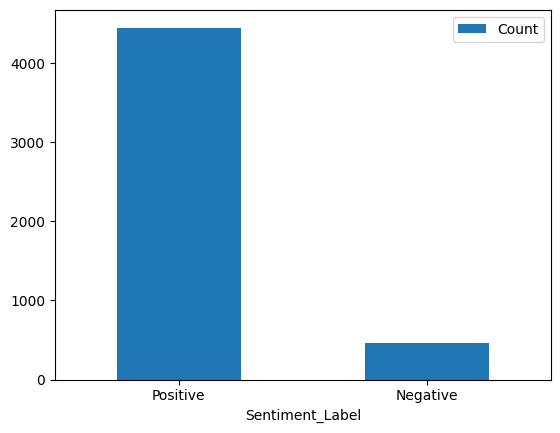

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the Amazon Reviews dataset
df = pd.read_csv('/content/sample_data/amazon.csv')


# Drop all the unnecessary columns that are not needed for analysis
df = df.drop(['reviewTime', 'reviewerName'], axis=1)

# Convert the star ratings to binary labels
df['Sentiment'] = (df['overall'] >= 4).astype(int)
df['reviewText'] = df['reviewText'].fillna("")


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['Sentiment'], test_size=0.25)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Transform the training and test sets
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a LogisticRegression model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Evaluate the model
score = model.score(X_test_tfidf, y_test)

print('Accuracy:', score)
# Predict the sentiment of the first review in the test set
prediction = model.predict(X_test_tfidf[0])

# Print the prediction
print(prediction)
# Get the probability distribution for the first review in the test set
probabilities = model.predict_proba(X_test_tfidf[0])

# Print the probability distribution
print(probabilities)
sentiment_counts = df['Sentiment'].value_counts()
sentiment_df = pd.DataFrame({'Sentiment': sentiment_counts.index, 'Count': sentiment_counts.values})
sentiment_df['Sentiment_Label'] = sentiment_df['Sentiment'].map({1: 'Positive', 0: 'Negative'})


# Plot the DataFrame as a bar graph
sentiment_df.plot(kind='bar', x='Sentiment_Label', y='Count', rot=0)

TfIdvectorizer-TfidfVectorizer is a class in the scikit-learn library that is used to transform text into a numerical representation that can be used by machine learning algorithms. The TfidfVectorizer works by first breaking the text into words. Then, it calculates the term frequency (tf) for each word in each document. The tf is the number of times the word appears in the document. The TfidfVectorizer then calculates the inverse document frequency (idf) for each word. The idf is a measure of how rare the word is in the corpus. The final representation of each document is a vector of tf-idf values for each word.